# Bicycle and Pedestrian Crashes by Month

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib._color_data import TABLEAU_COLORS
import matplotlib.ticker as mtick

from crash_data_analysis import CrashDataAnalysis
cda = CrashDataAnalysis()

In [2]:
# Aggregate fatality crashes by year and day of year

query = """
select
to_char(reported_date, 'YYYY-MM') as crash_year_month
, count(*) as num_crashes
, sum(case when pedestrian_ind > 0 then 1 else 0 end) as pedestrian_involved_crash
, sum(case when bicycle_ind > 0 then 1 else 0 end) as bicycle_involved_crash

from crashes

group by 1 order by 1
"""

crashes_by_month = pd.read_sql(query, cda.conn)

In [3]:
crashes_by_month['pedestrian_involved_crash_perc'] = (
    crashes_by_month['pedestrian_involved_crash'] / crashes_by_month['num_crashes']
)

crashes_by_month['bicycle_involved_crash_perc'] = (
    crashes_by_month['bicycle_involved_crash'] / crashes_by_month['num_crashes']
)

crashes_by_month['crash_year_month_dt'] = pd.to_datetime(crashes_by_month['crash_year_month'])

crashes_by_month.tail(24)

,crash_year_month,num_crashes,pedestrian_involved_crash,bicycle_involved_crash,pedestrian_involved_crash_perc,bicycle_involved_crash_perc,crash_year_month_dt
99,2021-04,1483,18,9,0.012138,0.006069,2021-04-01
100,2021-05,1603,23,16,0.014348,0.009981,2021-05-01
101,2021-06,1600,37,23,0.023125,0.014375,2021-06-01
102,2021-07,1629,27,15,0.016575,0.009208,2021-07-01
103,2021-08,1659,40,16,0.024111,0.009644,2021-08-01
104,2021-09,1684,50,25,0.029691,0.014846,2021-09-01
105,2021-10,1725,64,14,0.037101,0.008116,2021-10-01
106,2021-11,1554,51,16,0.032819,0.010296,2021-11-01
107,2021-12,1414,38,8,0.026874,0.005658,2021-12-01
108,2022-01,1398,23,5,0.016452,0.003577,2022-01-01


## Bicycle crashes by month

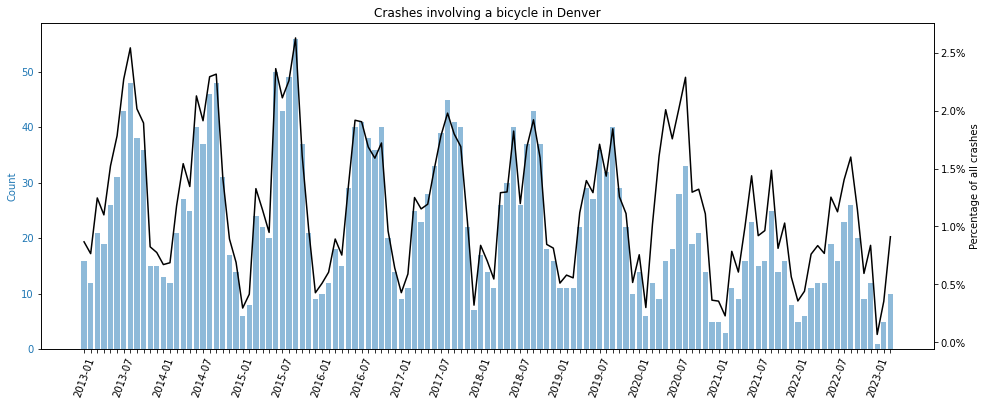

In [4]:
fig, ax1 = plt.subplots(figsize=(16,6))

data_to_plot = crashes_by_month.copy()

ax1_color = TABLEAU_COLORS['tab:blue']
ax1.bar(
    x=data_to_plot['crash_year_month']
    , height=data_to_plot['bicycle_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year_month']
    , data_to_plot['bicycle_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))

ax1.tick_params(axis='x', rotation=70)

n = 6  # Keep every Nth label
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

plt.title('Crashes involving a bicycle in Denver')
plt.savefig('images/crashes_by_month_bicycle.png', facecolor='white', bbox_inches='tight')

## Pedestrian crashes by month

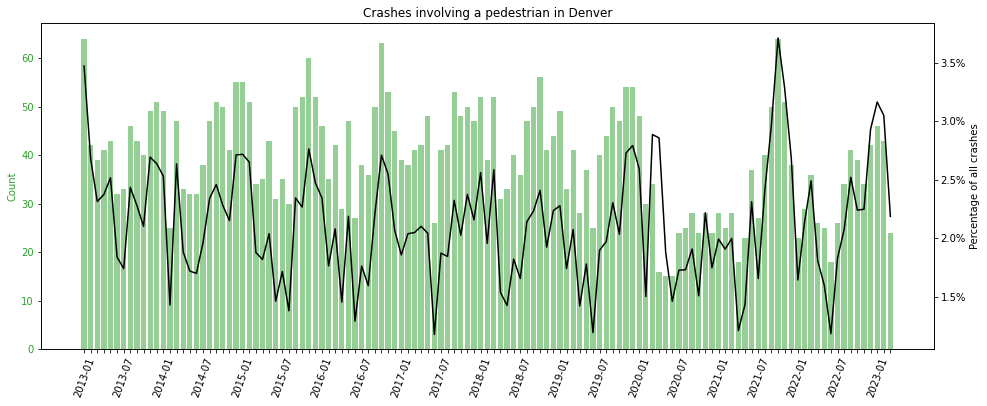

In [5]:
fig, ax1 = plt.subplots(figsize=(16,6))

data_to_plot = crashes_by_month.copy()

ax1_color = TABLEAU_COLORS['tab:green']
ax1.bar(
    x=data_to_plot['crash_year_month']
    , height=data_to_plot['pedestrian_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year_month']
    , data_to_plot['pedestrian_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))

ax1.tick_params(axis='x', rotation=70)

n = 6  # Keep every Nth label
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

plt.title('Crashes involving a pedestrian in Denver')
plt.savefig('images/crashes_by_month_pedestrian.png', facecolor='white', bbox_inches='tight')

## Crashes by year

In [6]:
query = """
select
to_char(reported_date, 'YYYY') as crash_year
, count(*) as num_crashes
, sum(case when pedestrian_ind > 0 then 1 else 0 end) as pedestrian_involved_crash
, sum(case when bicycle_ind > 0 then 1 else 0 end) as bicycle_involved_crash

from crashes

where to_char(reported_date, 'YYYY') < '2023'

group by 1 order by 1
"""

crashes_by_year = pd.read_sql(query, cda.conn)

crashes_by_year['pedestrian_involved_crash_perc'] = (
    crashes_by_year['pedestrian_involved_crash'] / crashes_by_year['num_crashes']
)

crashes_by_year['bicycle_involved_crash_perc'] = (
    crashes_by_year['bicycle_involved_crash'] / crashes_by_year['num_crashes']
)

crashes_by_year

,crash_year,num_crashes,pedestrian_involved_crash,bicycle_involved_crash,pedestrian_involved_crash_perc,bicycle_involved_crash_perc
0,2013,21594,523,320,0.024220,0.014819
1,2014,23097,500,331,0.021648,0.014331
2,2015,24810,528,345,0.021282,0.013906
3,2016,25441,511,313,0.020086,0.012303
4,2017,25901,515,323,0.019883,0.012471
5,2018,25574,521,315,0.020372,0.012317
6,2019,24881,502,280,0.020176,0.011254
7,2020,15925,311,195,0.019529,0.012245
8,2021,18465,429,161,0.023233,0.008719
9,2022,18087,373,171,0.020623,0.009454


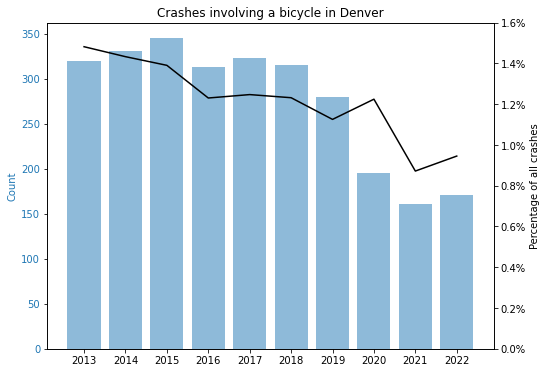

In [7]:
fig, ax1 = plt.subplots(figsize=(8,6))

data_to_plot = crashes_by_year.copy()

ax1_color = TABLEAU_COLORS['tab:blue']
ax1.bar(
    x=data_to_plot['crash_year']
    , height=data_to_plot['bicycle_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year']
    , data_to_plot['bicycle_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))
ax2.set_ylim(bottom=0, top=0.016)

ax1.tick_params(axis='x', rotation=0)


plt.title('Crashes involving a bicycle in Denver')
plt.savefig('images/crashes_by_year_bicycle.png', facecolor='white', bbox_inches='tight')

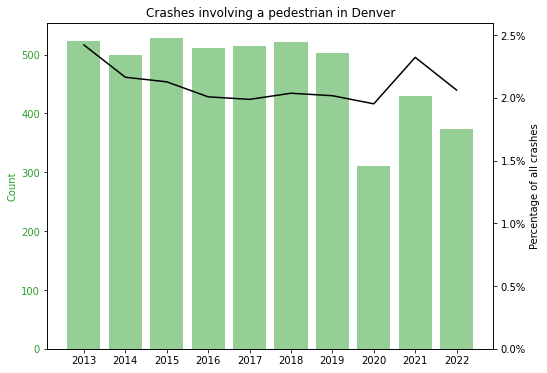

In [8]:
fig, ax1 = plt.subplots(figsize=(8,6))

data_to_plot = crashes_by_year.copy()

ax1_color = TABLEAU_COLORS['tab:green']
ax1.bar(
    x=data_to_plot['crash_year']
    , height=data_to_plot['pedestrian_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year']
    , data_to_plot['pedestrian_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))
ax2.set_ylim(bottom=0, top=0.026)

ax1.tick_params(axis='x', rotation=0)

plt.title('Crashes involving a pedestrian in Denver')
plt.savefig('images/crashes_by_year_pedestrian.png', facecolor='white', bbox_inches='tight')